In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [98]:
df = pd.read_csv('iris.data')
df.head()

,s length,s width,p length,p width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
df['target'] = iris.target
df.head()

,s length,s width,p length,p width,name,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [100]:
df[df.target==1].head()

,s length,s width,p length,p width,name,target
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,1
52,6.9,3.1,4.9,1.5,Iris-versicolor,1
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,1


In [101]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

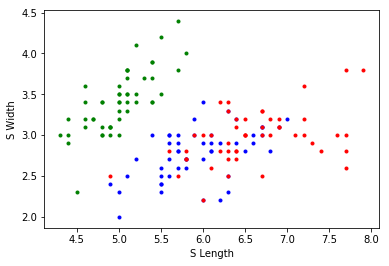

In [102]:
plt.xlabel('S Length')
plt.ylabel('S Width')
plt.scatter(df0['s length'], df0['s width'],color="green",marker='.')
plt.scatter(df1['s length'], df1['s width'],color="blue",marker='.')
plt.scatter(df2['s length'], df2['s width'],color="red",marker='.')

##KNN model to predict the iris in the dataset and find out the best K in this case


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [104]:
X = df.drop(['target','name'], axis='columns')
y = df.target

In [109]:
X_tv1, X_test1, y_tv, y_test = train_test_split(X,y, random_state = 2)
X_train1, X_valid1, y_train, y_valid = train_test_split(X_tv1, y_tv, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train1)
X_valid = scaler.fit_transform(X_valid1)
X_tv = scaler.fit_transform(X_tv1)
X_test = scaler.transform(X_test1)

Best accuracy using train KNN score: 0.89
Best parameters of k between 1-40: {'K': 4}


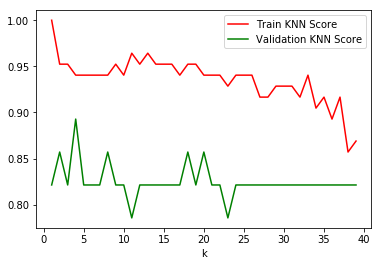

In [112]:
train_arr = []
valid_arr = []
best_score = 0
for k in range(1,40):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_arr.append(knn.score(X_train, y_train))
    score = knn.score(X_valid, y_valid)
    valid_arr.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K' : k}
            best_K = k

x_axis = range(1,40)
plt.plot(x_axis, train_arr, c = 'r', label = 'Train KNN Score')
plt.plot(x_axis, valid_arr, c = 'g', label = 'Validation KNN Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('')
print("Best accuracy using train KNN score: {:.2f}".format(best_score))
print("Best parameters of k between 1-40: {}".format(best_parameters))

##finding out the best K score in the range of 1-40 and it is found to be k=4

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [111]:
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_tv, y_tv, cv =6, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average of the cross-validation scores: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.95        0.95        1.          1.          0.88235294  1.        ]
Average of the cross-validation scores: 0.96


##The accuracy score on an average using cross-validation score is 0.96
